离散傅里叶变换(DFT)
$$
X_k = \sum_{n=0}^{N-1} x_n e^{-i 2\pi kn/N}
$$
其逆变换为
$$
x_n = \frac{1}{N}\sum_{n=0}^{N-1}X_k  e^{i 2\pi kn/N}
$$

下面来展示快速傅里叶变换。快速傅里叶变换利用离散傅里叶的对称性，把问题分而治之，从而减小运算量。
对序列 $x(n)$ 取 $N$ 点 DFT，假定 $N$ 是 2 的整数次方
$$N = 2^M$$
其中 $M$ 是正整数。把 $x(n)$ 的 DFT 运算按 $n$ 为偶数和 $n$ 为奇数分解为两部分：
$$
X(k) = \sum_{n=0}^{N-1} x(n) W_N^{nk}$$
$$= \sum_{\text{偶数 } n} x(n) W_N^{nk} + \sum_{\text{奇数 } n} x(n) W_N^{nk}$$
以符号 $2r$ 表示偶数 $n$，$2r+1$ 表示奇数 $n$，$r$ 的范围是 $0, 1, \cdots, \frac{N}{2}-1$，有
$$
X(k) = \sum_{r=0}^{\frac{N}{2}-1} x(2r) W_N^{2rk} + \sum_{r=0}^{\frac{N}{2}-1} x(2r+1) W_N^{(2r+1)k}$$
$$= \sum_{r=0}^{\frac{N}{2}-1} x(2r) (W_N^{2})^{rk} + W_N^{k} \sum_{r=0}^{\frac{N}{2}-1} x(2r+1) (W_N^{2})^{rk}$$
式中的 $W_N^2$ 可转换为 $W_{\frac{N}{2}}$，这是因为
$$
W_N^2 = e^{-2j\left(\frac{2\pi}{N}\right)} = e^{-j\left(\frac{2\pi}{2}\right)} = W_{\frac{N}{2}}$$
于是有
$$X(k) = \sum_{r=0}^{\frac{N}{2}-1} x(2r) W_{\frac{N}{2}}^{rk} + W_N^{k} \sum_{r=0}^{\frac{N}{2}-1} x(2r+1) W_{\frac{N}{2}}^{rk}$$
$$
= G(k) + W_N^{k} H(k)$$
式中
$$G(k) = \sum_{r=0}^{\frac{N}{2}-1} x(2r) W_{\frac{N}{2}}^{rk}$$
$$
H(k) = \sum_{r=0}^{\frac{N}{2}-1} x(2r+1) W_{\frac{N}{2}}^{rk}$$
于是一个N点的DFT就被分解为了两个N/2点的DFT。注意，G(k)和H(k)只有N/2个点，r=0,1,2,...,N/2-1，而X(k)却需要N个点，k=0,1,2,...,N-1，如果以G(k),H(k)表达全部X(k)，应利用G(k)与H(k)的周期性，
$$G(k+N/2)=G(k)$$
$$
H(k+N/2)=H(k)$$
由此得到
$$W_N^{(N/2+k)}=W_N^N\cdot W_N^k=-W_N^k$$
最后进行汇总
$$
X(k)=G(k)+W_N^kH(k)$$
$$X(N/2+k)=G(N/2+k)-W_N^kH(N/2+k)$$
$$
=G(k)-W_N^kH(k)$$
其中k=0,1,...,N/2-1，这两个式子分别给出X(k)的前N/2点与后N/2点的数值，总共有N个值。

## 1.第一步：码位倒置

在进行FFT之前需要对数据顺序做一下的调整，这样做的自的是为了保证输出数据是顺序的，否则输入顺序的输出就是乱序的(但是
有规律的),这个调整称为“码位倒置”,规律如下：


<table>
	<tbody>
		<tr>
			<th>自然顺序</th>
			<th>二进制表示</th>
			<th>码位倒置</th>
			<th>码位倒读顺序</th>
		</tr>
		<tr>
			<td>0</td>
			<td>000</td>
			<td>000</td>
			<td>0</td>
		</tr>
		<tr>
			<td>1</td>
			<td>001</td>
			<td>100</td>
			<td>4</td>
		</tr>
		<tr>
			<td>2</td>
			<td>010</td>
			<td>010</td>
			<td>2</td>
		</tr>
		<tr>
			<td>3</td>
			<td>011</td>
			<td>110</td>
			<td>6</td>
		</tr>
		<tr>
			<td>4</td>
			<td>100</td>
			<td>001</td>
			<td>1</td>
		</tr>
		<tr>
			<td>5</td>
			<td>101</td>
			<td>101</td>
			<td>5</td>
		</tr>
		<tr>
			<td>6</td>
			<td>110</td>
			<td>011</td>
			<td>3</td>
		</tr>
		<tr>
			<td>7</td>
			<td>111</td>
			<td>111</td>
			<td>7</td>
		</tr>
	</tbody>
</table>

简单解释一下为什么这样做。

举例说明，假设原多项式

$$A = 1.0 + 2.0x + 3.0x^{2} + 4.0x^{3} + 5.0x^{4} + 6.0x^{5} + 7.0x^{6} + 8.0x^{7}$$
其中 x 是 $W_8^1$ 是 1 的 8 次单位根。
第一次分治:
$$
A_{0} = 1.0 + 3.0x + 5.0x^{2} + 7.0x^{3}$$
$$A_{1} = 2.0 + 4.0x + 6.0x^{2} + 8.0x^{3}$$
$$
A(x) = A_{0}(x^{2}) + xA_{1}(x^{2})$$
则有:
$$A(W_{8}^{s}) = A_{0}(W_{4}^{s}) + W_{8}^{s}A_{1}(W_{4}^{s})$$
$W_{8}^{s}$ 表示 8 次单位根的 $s$ 次方; $(W_{8}^{s})^{2} = W_{4}^{s}$.
第二次分治:
$$
A_{0,0} = 1.0 + 5.0x$$
$$A_{0,1} = 3.0 + 7.0x$$
$$
A_{0}(x) = A_{0,0}(x^{2}) + xA_{0,1}(x^{2})$$
$$A_{0}(W_{4}^{s}) = A_{0,0}(W_{2}^{s}) + W_{4}^{s}A_{0,1}(W_{2}^{s})$$
$$
A_{1,0} = 2.0 + 6.0x$$
$$A_{1,1} = 4.0 + 8.0x$$
$$
A_{1}(x) = A_{1,0}(x^{2}) + xA_{1,1}(x^{2})$$
$$A_1(W_4^s)=A_{1,0}(W_2^s)+W_4^sA_{1,1}(W_2^s)$$

第三次分治(常数):

$A_{0,0,0}=1.0,A_{0,0,1}=5.0,A_{0,1,0}=3.0,A_{0,1,1}=7.0$

$$A_{1,0,0}=2.0,A_{1,0,1}=6.0,A_{1,1,0}=4.0,A_{1,1,1}=8.0$$

可见，A 的下标与值的索引有一个比特翻转的关系，比如 5.0 是第 4 项的系数，而 A 的下标是 1,转换成二进制就有比特翻转的关系。

第L级的系数因子为(L=1,2,3...M)
$W_{2^{L}}^{J}$, $J=0,1,2……2^{L-1}-1$
即第L级的蝶形运算系数因子类型数为$2^{L-1}$个，
如N=8，共有M=3级

第一级$2^{0}$个为:$W_{2^{1}}^{J}=W_{2^{M}2^{1-M}}^{J}=W_{2^{M}}^{J2^{M-1}}\left|_{L=1,J=0}\right.$ = $W_{N}^{0}$

第二级$2^{1}$个为:$W_{N}^{J2^{M-L}}=$
$\begin{cases}
W_{N}^{0};L=2,J=0 \\
W_{N}^{2};L=2,J=1
\end{cases}$

第三级$2^{2}$个为:$W_{N}^{J2^{M-L}}=$
$\begin{cases}
W_{N}^{0};L=3,J=0 \\
W_{N}^{1};L=3,J=1 \\
W_{N}^{2};L=3,J=2 \\
W_{N}^{3};L=3,J=3
\end{cases}$

因此8点蝶形 fft 的蝶形算法的图像为：

![jupyter](./8点蝶形.png)

其中

![jupyter](./蝶形.png)

下面我们用递归算法实现fft:

In [6]:
import numpy as np
def DFT(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

def FFT(x):
    """A recursive version of the Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
  
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 32:  # this cutoff should be optimized
        return DFT(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N // 2] * X_odd,
                               X_even + factor[N // 2:] * X_odd])

x = np.random.random(1024)
print(FFT(x))
print(np.fft.fft(x))
np.allclose(FFT(x), np.fft.fft(x))

[500.13488831 +0.j          -5.24466613+17.39105368j
   7.56346774 +8.36683232j ...  -4.44623727 +7.38158943j
   7.56346774 -8.36683232j  -5.24466613-17.39105368j]
[500.13488831 +0.j          -5.24466613+17.39105368j
   7.56346774 +8.36683232j ...  -4.44623727 +7.38158943j
   7.56346774 -8.36683232j  -5.24466613-17.39105368j]


True

在递归 FFT 中，输入数据的 bit-reversal 重排是通过递归调用和分治法的逻辑自然完成的，而无需显式地重排数据。这是 Cooley-Tukey FFT 的一个关键特性。

分治法的核心逻辑

1. 分解输入数据：
   - 偶数索引部分：$x[::2]$，即 $x[0], x[2], x[4], \ldots$。
   - 奇数索引部分：$x[1::2]$，即 $x[1], x[3], x[5], \ldots$。

2. 递归调用：
   - 对偶数部分和奇数部分分别递归计算 FFT。
   - 递归会继续对偶数部分的偶数索引和奇数索引进行分解，直到每个子问题的规模为 1。

3. 结果组合：
   - 使用旋转因子 $W_k = e^{-2\pi ik/N}$ 将偶数和奇数部分的结果组合。

通过这种方式，数据在递归过程中会自动按照 bit-reversal 重排的顺序被访问和处理。

递归中的隐式重排示例
假设输入数据长度为 $N = 8$，数据索引为：
$$x = [0, 1, 2, 3, 4, 5, 6, 7]$$

第一层递归

- 偶数索引: $x[::2] = [0, 2, 4, 6]$
- 奇数索引: $x[1::2] = [1, 3, 5, 7]$

第二层递归

对偶数索引 [0, 2, 4, 6]：

- 偶数索引: [0, 4]
- 奇数索引: [2, 6]

对奇数索引 [1, 3, 5, 7]：

- 偶数索引: [1, 5]
- 奇数索引: [3, 7]

第三层递归

对 [0, 4]：

- 偶数索引: [0]
- 奇数索引: [4]

对 [2, 6]：
- 偶数索引: [2]
- 奇数索引: [6]

对 [1, 5]：
- 偶数索引: [1]
- 奇数索引: [5]

对 [3, 7]：
- 偶数索引: [3]
- 奇数索引: [7]

结果

经过递归分解后，数据的访问顺序就是 bit-reversal 的顺序:
[0, 4, 2, 6, 1, 5, 3, 7]

注意上面的递归FFT实现，在最底层的递归，我们做了N/32次的矩阵向量乘积。我们的算法会得益于将这些矩阵向量乘积化为一次性计算的矩阵-矩阵乘积。在每一层的递归，重复的计算也可以被向量化。因为NumPy很擅长这类操作，我们可以利用这一点来实现向量化的FFT。向量化的具体描述如下：

将输入信号分为偶数索引和奇数索引两部分
$$x[n] = x_{\text{even}}[n] + x_{\text{odd}}[n]$$

频谱可以分解为:
$$
X_k = X_{\text{even},k} + W_k \cdot X_{\text{odd},k}, \quad k = 0, 1, \ldots, N/2 - 1$$
$$X_{k+N/2} = X_{\text{even},k} - W_k \cdot X_{\text{odd},k}, \quad k = 0, 1, \ldots, N/2 - 1$$
向量化实现
通过向量化，我们将这一步改写为矩阵形式:

构造偶数和奇数频谱的矩阵:
$$
\mathbf{X}_{\text{even}} = \begin{bmatrix}
X_0 \\
X_1 \\
\vdots \\
X_{N/2-1}
\end{bmatrix}, \quad
\mathbf{X}_{\text{odd}} = \begin{bmatrix}
X_{N/2} \\
X_{N/2+1} \\
\vdots \\
X_{N-1}
\end{bmatrix}
$$

使用旋转因子向量化计算:

$$
\mathbf{X} = \begin{bmatrix}
\mathbf{X}_{\text{even}} + \mathbf{W}_k \cdot \mathbf{X}_{\text{odd}} \\
\mathbf{X}_{\text{even}} - \mathbf{W}_k \cdot \mathbf{X}_{\text{odd}}
\end{bmatrix}
$$

其中:
- $\mathbf{W}_k = e^{-2\pi ik/N}$ 是旋转因子向量。

向量化的核心公式对比

| 操作 | 传统实现（循环） | 向量化实现（矩阵） |
| --- | --- | --- |
| **DFT 计算** | 每个分量循环 | $\mathbf{X} = \mathbf{W} \cdot \mathbf{x}$ |
| **FFT 的分治公式** | 对每个 $k$，分别计算 $X_{k}$ 和 $X_{k+N/2}$ | 批量计算：$\mathbf{X} = [\mathbf{X}_{\text{even}} + \mathbf{W}_{\mathbf{k}} \cdot \mathbf{X}_{\text{odd}}]$ |
| **旋转因子的计算** | 对每个 $k$ 显式计算 $W_{k} = e^{-2\pi ik/N}$ | 一次性计算所有 $W_{k}$，利用广播机制与向量相乘 |
| **数据拼接** | 使用循环逐一拼接结果 | 使用 np.vstack 或 np.concatenate 一次性拼接整个矩阵 |

In [14]:
def FFT_vectorized(x):
    """A vectorized, non-recursive version of the Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
 
    if np.log2(N) % 1 > 0:
        raise ValueError("size of x must be a power of 2")
 
    N_min = min(N, 32)
 
    # Perform an O[N^2] DFT on all length-N_min sub-problems at once
    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))
 
    # build-up each level of the recursive calculation all at once
    while X.shape[0] < N:
        X_even = X[:, :X.shape[1] // 2]
        X_odd = X[:, X.shape[1] // 2:]
        factor = np.exp(-1j * np.pi * np.arange(X.shape[0])
                        / X.shape[0])[:, None]
        X = np.vstack([X_even + factor * X_odd,
                       X_even - factor * X_odd])
 
    return X.ravel()

x = np.random.random(1024)
np.allclose(FFT_vectorized(x), np.fft.fft(x))

True

In [16]:
x = np.random.random(1024 * 16)
%timeit FFT(x)
 
%timeit FFT_vectorized(x)
 
%timeit np.fft.fft(x)

42.7 ms ± 5.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.64 ms ± 62.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
245 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


除了递归的方法，我们也可以直接按通过蝶形图计算。这里给出 https://www.jianshu.com/p/0bd1ddae41c4 的代码。

In [17]:
from cmath import sin, cos, pi

class FFT_pack():
    def __init__(self, _list=[], N=0):  # _list 是传入的待计算的离散序列，N是序列采样点数，必须是2^n
        self.list = _list  # 初始化数据
        self.N = N
        self.total_m = 0  # 序列的总层数
        self._reverse_list = []  # 位倒序列表
        self.output =  []  # 计算结果存储列表
        self._W = []  # 系数因子列表
        for _ in range(len(self.list)):
            self._reverse_list.append(self.list[self._reverse_pos(_)])
        self.output = self._reverse_list.copy()
        for _ in range(self.N):
            self._W.append((cos(2 * pi / N) - sin(2 * pi / N) * 1j) ** _)  # 提前计算W值，降低算法复杂度

    def _reverse_pos(self, num) -> int:  # 得到位倒序后的索引
        out = 0
        bits = 0
        _i = self.N
        data = num
        while (_i != 0):
            _i = _i // 2
            bits += 1
        for i in range(bits - 1):
            out = out << 1
            out |= (data >> i) & 1
        self.total_m = bits - 1
        return out

    def FFT(self, _list, N, abs=True) -> list:  # 计算给定序列的傅里叶变换结果，返回一个列表，结果是没有经过归一化处理的
        """参数abs=True表示输出结果是否取得绝对值"""
        self.__init__(_list, N)
        for m in range(self.total_m):
            _split = self.N // 2 ** (m + 1)
            num_each = self.N // _split
            for _ in range(_split):
                for __ in range(num_each // 2):
                    temp = self.output[_ * num_each + __]
                    temp2 = self.output[_ * num_each + __ + num_each // 2] * self._W[__ * 2 ** (self.total_m - m - 1)]
                    self.output[_ * num_each + __] = (temp + temp2)
                    self.output[_ * num_each + __ + num_each // 2] = (temp - temp2)
        if abs == True:
            for _ in range(len(self.output)):
                self.output[_] = self.output[_].__abs__()
        return self.output

    def FFT_normalized(self, _list, N) -> list:  # 计算给定序列的傅里叶变换结果，返回一个列表，结果经过归一化处理
        self.FFT(_list, N)
        max = 0   # 存储元素最大值
        for _ in range(len(self.output)):
            if max < self.output[_]:
                max = self.output[_]
        for _ in range(len(self.output)):
            self.output[_] /= max
        return self.output

    def IFFT(self, _list, N) -> list:  # 计算给定序列的傅里叶逆变换结果，返回一个列表
        self.__init__(_list, N)
        for _ in range(self.N):
            self._W[_] = (cos(2 * pi / N) - sin(2 * pi / N) * 1j) ** (-_)
        for m in range(self.total_m):
            _split = self.N // 2 ** (m + 1)
            num_each = self.N // _split
            for _ in range(_split):
                for __ in range(num_each // 2):
                    temp = self.output[_ * num_each + __]
                    temp2 = self.output[_ * num_each + __ + num_each // 2] * self._W[__ * 2 ** (self.total_m - m - 1)]
                    self.output[_ * num_each + __] = (temp + temp2)
                    self.output[_ * num_each + __ + num_each // 2] = (temp - temp2)
        for _ in range(self.N):  # 根据IFFT计算公式对所有计算列表中的元素进行*1/N的操作
            self.output[_] /= self.N
            self.output[_] = self.output[_].__abs__()
        return self.output



if __name__ == '__main__':
   list = [1, 2, 3, 4, 5, 6, 7, 8, 0, 0, 0, 0, 0, 0, 0, 0]
   a = FFT_pack().FFT(list, 16, False)
   print(a)

[(36+0j), (-8.137071184544096-25.136697460629236j), (-3.9999999999999982+9.65685424949238j), (3.3800855955782216-7.483028813327445j), (-3.999999999999999+4j), (4.276768653914152-3.3408931895964953j), (-3.999999999999999+1.6568542494923806j), (4.480216935051706-0.994561836898292j), (-4+0j), (4.48021693505171+0.9945618368982885j), (-4-1.6568542494923797j), (4.276768653914156+3.340893189596491j), (-4.000000000000001-4j), (3.3800855955782296+7.483028813327443j), (-4.000000000000003-9.65685424949238j), (-8.137071184544078+25.136697460629247j)]


这里面对函数 _reverse_pos(self, num) -> int 给一些解释。这种方法的主要作用是计算给定索引 num 的位倒序（bit-reversed index），

for i in range(bits - 1):
    out = out << 1
    out |= (data >> i) & 1
    
这一段的目的是将输入的整数 num（在这里是 data）的二进制位按照倒序的方式构建到 out 中。具体来说，它通过逐位提取 data 中的位并将其插入到 out 的相应位置。

out = out << 1左移操作将 out 的当前值向左移动一位。这样做是为了为下一个位的插入留出空间。
举个例子，如果 out 当前为 000（在三位二进制中），左移后变为 0000（四位）。这为新位的添加做好准备。

data >> i 将 data 右移 i 位。这会将我们想要提取的位移动到最低位。
& 1 操作会获取移动后的最低位的值，即 0 或 1。
例如，如果 data 是 011，当 i = 0 时，(data >> 0) & 1 会得到 1；当 i = 1 时，(data >> 1) & 1 会得到 1；当 i = 2 时，(data >> 2) & 1 会得到 0。

out |= 将当前提取的位（来自 data 的第 i 位）与 out 的当前值进行按位或操作。
如果当前位是 1，则 out 的最低位会变为 1；如果当前位是 0，则 out 的最低位保持不变。
这样逐步更新 out，每次迭代都会将提取的位添加到 out 的最低位。

比如：out = 010, data 当前的最后一位为1，则out|=1等价于010 | 001 = 011->3，这种方式把data当前的最低位提取到out的最低位上。

举例说明
假设 N = 8，因此 bits = 3，我们要计算 num = 3（其二进制表示为 011）的位倒序：

初始状态：

out = 0（000）
data = 3（011）
迭代过程：

第 0 次迭代 (i = 0)：

左移：out = out << 1 -> out = 0（保持为 000）。
提取位：(data >> 0) & 1 -> 1。
更新 out：out |= 1 -> out = 1（现在 out 为 001）。
第 1 次迭代 (i = 1)：

左移：out = out << 1 -> out = 2（现在为 010）。
提取位：(data >> 1) & 1 -> 1。
更新 out：out |= 1 -> out = 3（现在 out 为 011）。
第 2 次迭代 (i = 2)：

左移：out = out << 1 -> out = 6（现在为 110）。
提取位：(data >> 2) & 1 -> 0。
更新 out：out |= 0 -> out = 6（保持为 110）。

In [18]:
import cv2

import numpy as np
import numpy.fft as fft
import matplotlib as mpl

import matplotlib.pyplot as plt

%matplotlib inline
mpl.rcParams['figure.figsize'] = (12, 5)
mpl.rcParams['image.cmap'] = "gray"

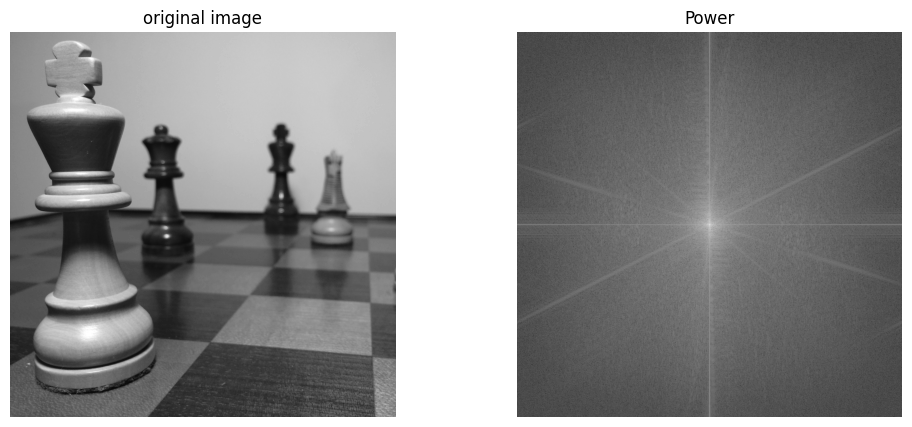

In [26]:
real_img = cv2.imread('test.png', cv2.IMREAD_GRAYSCALE)
Img = fft.fft2(real_img)
mag = np.abs(fft.fftshift(Img))
plt.subplot(1,2,1)
plt.imshow(real_img); plt.axis('off'); plt.title('original image');
plt.subplot(1,2,2)
plt.imshow(20*np.log10(mag**2 + 1)); plt.axis('off'); plt.title('Power');

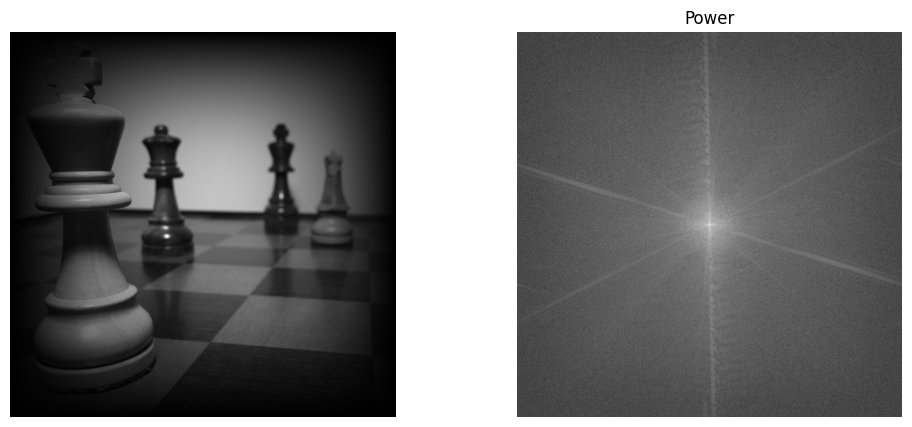

In [21]:
x = np.linspace(-np.pi/2, np.pi/2, real_img.shape[0])
y = np.linspace(-np.pi/2, np.pi/2, real_img.shape[1])
wx = np.cos(x)[np.newaxis, :]
wy = np.cos(y)[:, np.newaxis]
w_img = wx * wy * real_img
_Img = fft.fft2(w_img)
mag = np.abs(fft.fftshift(_Img))
plt.subplot(1,2,1)
plt.imshow(w_img); plt.axis('off');
plt.subplot(1,2,2)
plt.imshow(20*np.log10(mag**2 + 1)); plt.axis('off'); plt.title('Power');

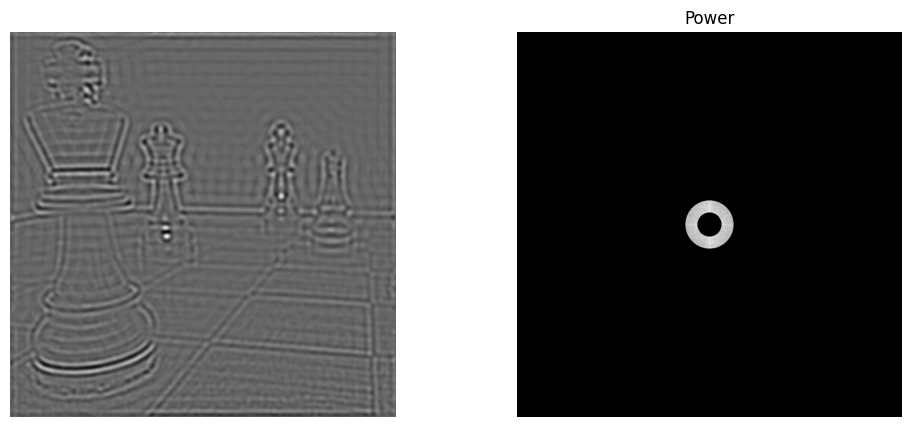

In [23]:
x, y = np.meshgrid(range(real_img.shape[0]), range(real_img.shape[1]))
r = np.sqrt((x - x.mean())**2 + (y - y.mean())**2)
Img = np.where((r > 32) & (r < 64), fft.fftshift(Img), 0)
mag = np.abs(Img)
plt.subplot(1,2,1)
plt.imshow(fft.ifft2(fft.fftshift(_Img)).real); plt.axis('off');
plt.subplot(1,2,2)
plt.imshow(20*np.log10(mag**2 + 1)); plt.axis('off'); plt.title('Power');